In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
model_4_data = pd.read_csv('data/model_3_data.csv')

In [3]:
model_4_data.sqft_living = np.log(model_4_data.sqft_living)

In [4]:
scaled_sqft_living = (model_4_data.sqft_living - min(model_4_data.sqft_living)) / (max(model_4_data.sqft_living) - min(model_4_data.sqft_living))
model_4_data.sqft_living = scaled_sqft_living

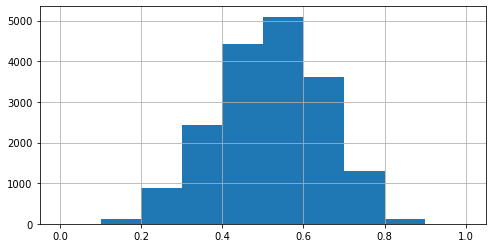

In [5]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
model_4_data['sqft_living'].hist(ax=ax);

In [6]:
model_4_data.sqft_lot = np.log(model_4_data.sqft_lot)

In [7]:
scaled_sqft_lot = (model_4_data.sqft_lot - min(model_4_data.sqft_lot)) / (max(model_4_data.sqft_lot) - min(model_4_data.sqft_lot))
model_4_data.sqft_lot = scaled_sqft_lot

In [8]:
target_variable = 'price'
input_variables = model_4_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)

In [9]:
model_4 = ols(formula=formula, data=model_4_data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     980.4
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:38:58   Log-Likelihood:            -2.3511e+05
No. Observations:               17991   AIC:                         4.703e+05
Df Residuals:                   17950   BIC:                         4.706e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.666e+05   2.75e+04      6.047      0.000    1.13e+05    2.21e+05
sqft_living          6.761e+05   1.21e+04     55.828      0.000    6.52e+05       7e+05
sqft_lot            -3.233e+04   8110.668     -3.986      0.000   -4.82e+04   -1.64e+04
waterfront            7.96e+04   2.09e+04      3.813      0.000    3.87e+04    1.21e+05
Season_Summer       -1.837e+04   2228.933     -8.241      0.000   -2.27e+04    -1.4e+04
Season_Fall         -2.384e+04   2359.956    -10.103      0.000   -2.85e+04   -1.92e+04
Season_Winter       -2.265e+04   2583.456     -8.768      0.000   -2.77e+04   -1.76e+04
Bedrooms_2           -1.34e+04   1.01e+04     -1.327      0.185   -3.32e+04    6396.379
Bedrooms_3          -2.613e+04   1.01e+04     -2.575      0.010    -4.6e+04   -6241.229
Bedrooms_4          -3.184e+04   1.04e+04     -3.050      0.002   -5.23e+04   -1.14e+04
Bedrooms_5          -4.125e+04    1.1e+04     -3.740      0.000   -6.29e+04   -1.96e+04
Bedrooms_6_up       -6.317e+04   1.32e+04     -4.790      0.000    -8.9e+04   -3.73e+04
Bathrooms_2           814.9536   2493.702      0.327      0.744   -4072.943    5702.850
Bathrooms_3           3.84e+04   4227.295      9.085      0.000    3.01e+04    4.67e+04
Bathrooms_4          6.825e+04   1.13e+04      6.033      0.000    4.61e+04    9.04e+04
Bathrooms_5_up      -1.178e+04   3.39e+04     -0.348      0.728   -7.82e+04    5.46e+04
Floors_2             1.427e+04   2770.023      5.151      0.000    8837.790    1.97e+04
Floors_3            -8696.1614   6214.333     -1.399      0.162   -2.09e+04    3484.528
View_1                9.36e+04   7455.080     12.555      0.000     7.9e+04    1.08e+05
View_2               7.873e+04   4597.051     17.126      0.000    6.97e+04    8.77e+04
View_3               1.089e+05   7306.829     14.910      0.000    9.46e+04    1.23e+05
View_4               2.182e+05   1.23e+04     17.782      0.000    1.94e+05    2.42e+05
Condition_2          8.406e+04   2.77e+04      3.029      0.002    2.97e+04    1.38e+05
Condition_3          1.056e+05   2.58e+04      4.091      0.000     5.5e+04    1.56e+05
Condition_4          1.338e+05   2.58e+04      5.179      0.000    8.32e+04    1.84e+05
Condition_5          1.613e+05    2.6e+04      6.212      0.000     1.1e+05    2.12e+05
Grade_Above_Average  9.653e+04   2308.433     41.815      0.000     9.2e+04    1.01e+05
Grade_High_Quality   2.537e+05   5654.768     44.859      0.000    2.43e+05    2.65e+05
second_chunk         -4.43e+04   3555.436    -12.460      0.000   -5.13e+04   -3.73e+04
third_chunk         -9.644e+04   3505.659    -27.511      0.000   -1.03e+05   -8.96e+04
fourth_chunk        -1.228e+05   3959.943    -31.006      0.000   -1.31e+05   -1.15e+05
fifth_chunk         -1.098e+05   4466.221    -24.588      0.000   -1.19e+05   -1.01e+05
ren

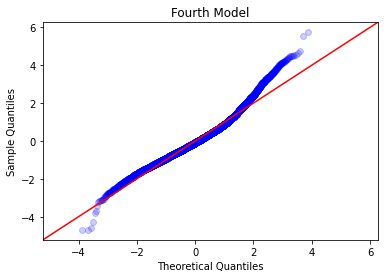

In [10]:
residuals = model_4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Fourth Model', size=12);

In [11]:
x_data = model_4_data.drop(['price'], axis=1)
y_data = model_4_data.price

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [13]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_estimate_train = linreg.predict(X_train)
y_estimate_test = linreg.predict(X_test)

In [14]:
train_rmse = mean_squared_error(Y_train, y_estimate_train, squared=False)
test_rmse = mean_squared_error(Y_test, y_estimate_test, squared=False)
print(train_rmse, test_rmse)

114948.9405563393 113935.58987575813


In [15]:
model_4_data.to_csv('data/model_4_data.csv', index=False)